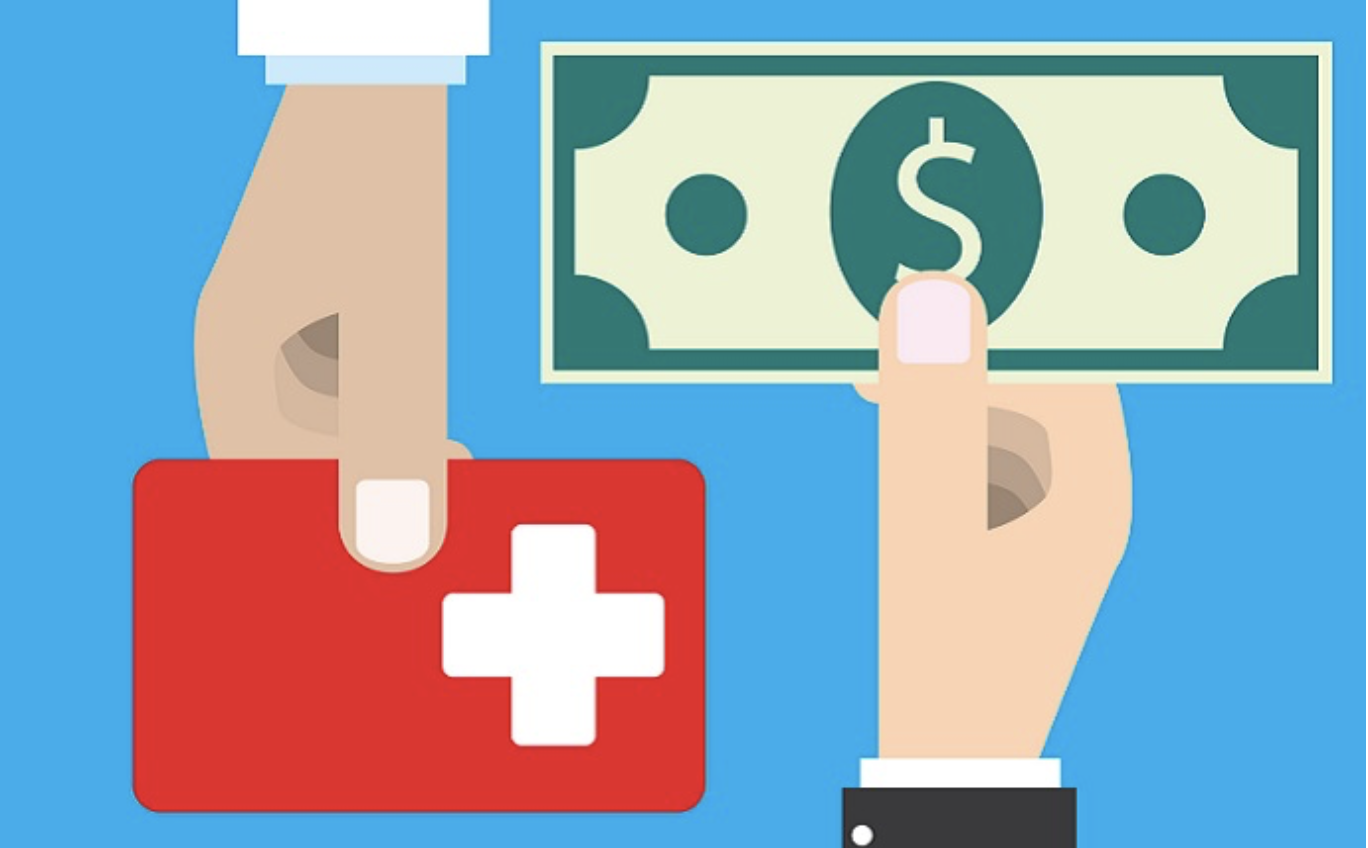

The goal of this notebook is to explore the dataset, determine the features that most affect the cost of medical care by using a heatmap and also by using the Backward Elimination Model (checking p value with respect to significance value).

After which different regression models are run to determine the best model to predict the charges given the features. The models that are trained are,
1. Multivariate Linear regression
2. Polynomial Regression
3. Decision Tree Regression
4. Random Forest Regression

In [ ]:
#import the initial libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
#The csv file is loaded as a dtaframe.
dataset = pd.read_csv("/kaggle/input/insurance/insurance.csv")

The length or the number of rows in the dataset is obtained.

In [ ]:
len(dataset)

By using the head function the first five rows of the dataset are displayed. These values are displayed for all the columns.

In [ ]:
dataset.head()

The datatype of each row is obtained using dtypes function.
As we can see here the columns of sex, smoker and region have data type object. This is because they have string values in them.

Sex - Male, Female.

Smoker - Yes, No.

Region - Northeast, Northwest, Southeast, Southwest.

In [ ]:
dataset.dtypes

Now to determine if the dataset has any null values or any NaN values. 

In [ ]:
dataset.isnull().sum()

Luckily this dataset has no values that means we can go ahead and check the correlation between the features and our desired column. 

The column of interest here is the "charges" column.

In [ ]:
#correlation between columns with respect to charges
dataset.corr()["charges"].sort_values()

Here we observe that only the children, bmi, age and charges column are being considered for checking of the correlation. This is because the corr() function performs operation only on numeric values.

Thus the columns that have data type object need to be converted to either int or float.

This can be done by using Label Encoding.

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.sex = le.fit_transform(dataset.sex)
dataset.smoker = le.fit_transform(dataset.smoker)
dataset.region = le.fit_transform(dataset.region)

In [ ]:
#checking data type
dataset.dtypes

In [ ]:
#checking correlation again
dataset.corr()["charges"].sort_values()

Now from these values it can be determined that the column that affects the charges most is the smoker feature followed by the age and bmi at third.

To confirm this we shall visualize it with the help of a heatmap.

In [ ]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), annot = True)

It can be confirmed from this visual representation that the correlation between charges and smoker is the highest.

The next step what we will be doing is determining which features are the best to train a model. This is done by using the Backward Elimination method where the significance level will be 0.05.

In [ ]:
#dividing the dataset into X and y matrix
#X has the features needed to predict charges
#y has the values of charges
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,6:7].values

In [ ]:
X

In [ ]:
y

Now, to calculate the p values of each of the feature the statsmodels.api feature is used.

In [ ]:
import statsmodels.api as sm

In [ ]:
#creating a new matrix with the first column consisting of all ones
X = np.append(arr = np.ones((1338,1)).astype(int), values = X, axis = 1)

In [ ]:
#selecting all the features initially to determine the p value
X_opt = X[:,[0,1,2,3,4,5,6]]

In [ ]:
#Using Ordinary Least Square (OLS) to determine the p value and other features
reg_OLS = sm.OLS(y,X_opt).fit()
reg_OLS.summary()

From this summary we notice that the p value of feature x2 is above the the significance level of 0.05. Hence we shall remove it and run the summary again.

In [ ]:
#After removing the x2 column
X_opt = X[:,[0,1,3,4,5,6]]
reg_OLS = sm.OLS(y,X_opt).fit()
reg_OLS.summary()

Since all the features have a p value less than the significance value we can conclude that these features are important in determining the charge.

Next we proceed to the main regression part.

First up is Multivariate Linear Regression.

In [ ]:
#reinitializing the matrix X and y
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,6:7].values

In [ ]:
#split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
#checking length of training set
len(X_train)

In [ ]:
#checking length of test set
len(X_test)

Lets begin performing the regression by using the sklearn library.

In [ ]:
#importing sklearn for Multivariate Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#fit the model with the training set
regressor.fit(X_train, y_train)

Now to predict the values for the test set and calculate the accuracy of the model.

In [ ]:
#calculating the score of the model
regressor.score(X_test, y_test)

This gives a accuracy of 79.98%. Not bad!

This is a good accuracy but lets try other regression methods to check if we can get a better model to predict charges.

Next up, Polynomial Regression!

In [ ]:
#reinitializing the X and y data 
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,6:7].values

Now that the X and y values have been reinitialized, the X matrix is used to develop a polynomial equation for charges. 

The degree chosen here is 2, higher degrees result in more number of columns.

In [ ]:
#importing the PolynomialFeatures from sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [ ]:
#fitting the polynomial equation model
X_poly = poly.fit_transform(X)

In [ ]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state = 0)

In [ ]:
#train the regressor model
regressor.fit(X_train, y_train)

In [ ]:
#score the model
regressor.score(X_test, y_test)

As you can see the accuracy of the model has improved, it now has an accuracy of 86.48% which is better than the Multivariate Regression which had an accuracy of 79.98%.

Next we try the Decision Tree Regression Model.

In [ ]:
#reinitialize X and y
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,6:7].values

In [ ]:
#train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
#importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#using the criterion of mean square error
regressor = DecisionTreeRegressor(criterion = "mse", random_state = 0)
regressor.fit(X_train,y_train)

In [ ]:
#importing metrics to calculate the r2 score and mse
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
#r2 score for the training set
r2_score(y_train, regressor.predict(X_train))

In [ ]:
#mse for the training set
mean_squared_error(y_train, regressor.predict(X_train))

In [ ]:
#r2 score for the test set
r2_score(y_test, regressor.predict(X_test))

In [ ]:
#mse for the test set
mean_squared_error(y_test, regressor.predict(X_test))

In this regression model we can clearly notice the biggest drawback of Decision Trees which is Overfitting. 

The r2 score of the training set is 99.98% while the r2 score of the test set is only 64.86%. This big drop in accuracy is only because the the model was overfitted.

This can be overcome by either pruning or by using a better model which is the Random Forest Regression.

In [ ]:
#importing the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#using 100 estimators for Random Forest Calculation
#takes average of 100 predictions and trains model
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

In [ ]:
#r2 score of training set
r2_score(y_train, regressor.predict(X_train))

In [ ]:
#mse of training set
mean_squared_error(y_train, regressor.predict(X_train))

In [ ]:
#r2 score of test set
r2_score(y_test, regressor.predict(X_test))

In [ ]:
#mse of test set
mean_squared_error(y_test, regressor.predict(X_test))

In Random Forest Regressor we notice a way better performance than the Decision Tree. This is because it is an ensemble method which takes multiple prediction and takes their average value to train the model, thus preventing overfitting.

The accuracy of the training and the test model are 97.49% and 87.32% respectively which is a massive gain over Decision Tree.

By checking each of the regression models it can be determined that the regression model having the highest accuracy for this dataset is the Random Forest Regressor.